# 1. SYRIATEL PREDICTIVE ANALYSIS OF CUSTOMER CHURN

## 1. Business Understanding




#### 1.1. Introduction

SyriaTel, a telecommunications company bases in Damascus Syria, encounters a notable obstacle in curtailing customer churn, which can detrimentally affect its revenue and overall profitability. Customer churn denotes the situation where customers terminate their subscriptions with a company, frequently transitioning to competitors or discontinuing the service entirely. Notably, poor service experience and customer service are among the primary contributors to customer churn. Additionally, the ease with which customers can switch providers and encountering subpar customer experiences, such as requiring multiple contacts for issue resolution, also significantly contribute to churn rates. These factors underscore the criticality of focusing on service quality and enhancing customer satisfaction to effectively diminish the churn rate.

#### 1.2. Business stakeholders

The primary stakeholder in this project is SyrialTel, a telecommunications company based in Damascus, Syria. Their core interest lies in understanding the patterns and reasons behind customer churn. By comprehensively understanding why customers leave, SyrialTel can take proactive measures to retain them. This includes improving service quality, enhancing customer support, and offering tailored solutions to address customer needs. By leveraging data-driven insights, SyrialTel can make informed decisions, tailor services, and allocate resources effectively to reduce churn. This proactive approach not only improves customer satisfaction but also leads to financial savings by minimizing revenue loss associated with customers discontinuing their services.

#### 1.3.  Main Objective

The main objective of this project is to build a predictive classifier that assists SyrialTel Telecommunication company in determining if there is a predictable pattern to customer churning.

#### 1.4.  Experimental Design

This outlines the processes to be undertaken in this project. They are:

1. Data Understanding
2. Data Cleaning
3. Exploratory Data Analysis
4. Data Preparation
5. Modelling
6. Evaluation
7. Conclusion

## 2. Data Understanding

#### 2.1. Data Description  

- The data utilized for this project has been sourced from [Kaggle](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).
The dataset contains 3333 entries and 21 columns, including information about the state, account length, area code, phone number, international plan, voice mail plan, number of voice mail messages, total day minutes, total day calls, total day charge, total evening minutes, total evening calls, total evening charge, total night minutes, total night calls, total night charge, total international minutes, total international calls, total international charge, customer service calls and churn.

#### **Summary of Features in the Dataset**
Each entry in the dataset represents a customer, and the attributes describe different aspects of their account and usage.

| Attribute                | Description                                                                                     |
|--------------------------|-------------------------------------------------------------------------------------------------|
| State                    | The state in which the customer resides.                                                       |
| Account Length           | The number of days the customer has had the account.                                             |
| Area Code                | The area code of the customer's phone number.                                                    |
| Phone Number             | The customer's phone number.                                                                    |
| International Plan       | A boolean indicating whether the customer has the international calling plan (True or False).   |
| Voice Mail Plan          | A boolean indicating whether the customer has the voicemail plan (True or False).               |
| Number Vmail Messages    | The number of voicemail messages the customer has sent.                                          |
| Total Day Minutes        | The total number of minutes the customer has been in calls during the day.                        |
| Total Day Calls          | The total number of calls the customer has made during the day.                                   |
| Total Day Charge         | The total amount of money charged by the telecom company for calls during the day.               |
| Total Eve Minutes        | The total number of minutes the customer has been in calls during the evening.                    |
| Total Eve Calls          | The total number of calls the customer has made during the evening.                               |
| Total Eve Charge         | The total amount of money charged by the telecom company for calls during the evening.           |
| Total Night Minutes      | The total number of minutes the customer has been in calls during the night.                      |
| Total Night Calls        | The total number of calls the customer has made during the night.                                  |
| Total Night Charge       | The total amount of money charged by the telecom company for calls during the night.             |
| Total Intl Minutes       | The total number of minutes the user has been in international calls.                             |
| Total Intl Calls         | The total number of international calls the customer has made.                                     |
| Total Intl Charge        | The total amount of money charged by the telecom company for international calls.                 |
| Customer Service Calls   | The number of calls the customer has made to customer service.                                     |
| Churn                    | A boolean indicating whether the customer terminated their contract (True or False).

#### 2.2. Suitability of above data in predicting customer churn
The dataset contains a variety of factors crucial for understanding customer behavior and forecasting churn for SyrialTel Company. Essential attributes include customer subscriptions like international plans and voice mail plans, as well as call usage statistics such as total day minutes and total night minutes. The 'Churn' column, which acts as the target variable, distinguishes between customers who have terminated their service ('True') and those who haven't ('False'). This comprehensive dataset lays the groundwork for building a predictive model to accurately identify churn risks and implement focused retention strategies. This aligns with the project's goal of effectively reducing customer churn.

#### 2.3 importing the required libraries,loading and checking the data

In [61]:
# Importing the relevant libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb

import joblib
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, make_scorer, auc
from sklearn.metrics import roc_auc_score,ConfusionMatrixDisplay,confusion_matrix , classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV


In [5]:
# loading the datasets
dataFrame = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

In [6]:
# Creating a copy of the dataset to work with.
data = dataFrame.copy()
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# checking the shape of the data
(data.shape)

(3333, 21)

In [8]:
# checking for the information about the data Frame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
# checking for the unique values in the data
for i in data.columns:
    print(f"Unique values in {i} are {data[i].nunique()}")

Unique values in state are 51
Unique values in account length are 212
Unique values in area code are 3
Unique values in phone number are 3333
Unique values in international plan are 2
Unique values in voice mail plan are 2
Unique values in number vmail messages are 46
Unique values in total day minutes are 1667
Unique values in total day calls are 119
Unique values in total day charge are 1667
Unique values in total eve minutes are 1611
Unique values in total eve calls are 123
Unique values in total eve charge are 1440
Unique values in total night minutes are 1591
Unique values in total night calls are 120
Unique values in total night charge are 933
Unique values in total intl minutes are 162
Unique values in total intl calls are 21
Unique values in total intl charge are 162
Unique values in customer service calls are 10
Unique values in churn are 2


### 3. Data Preparation

#### 3.1 Data Cleaning

In [10]:
# Converting Area Code to Object Since It Has No Mathematical Significance
data['area code'] = data['area code'].astype('object')

In [11]:
# Verifying that the area code has been converted to an object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the above information, phone number is best used as unique identifier as it cannot be similar to more than a person.

In [12]:
#checking for duplicates in the data
print(data.duplicated().sum())

0


In [13]:
# checking for missing values in the data
print(data.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


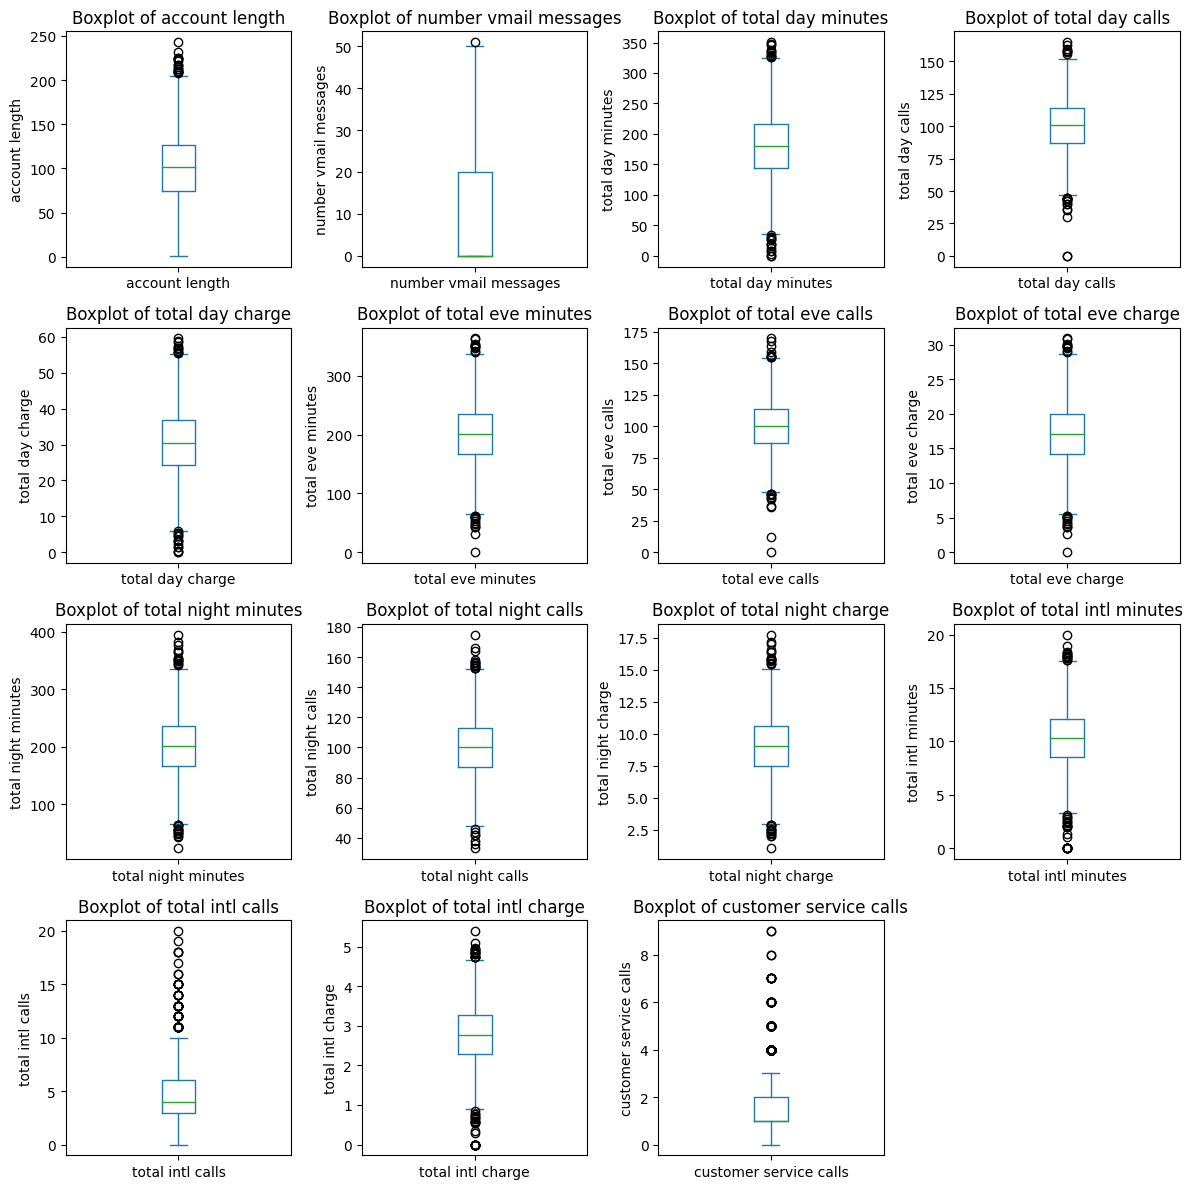

In [14]:
# checking for outliers in numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
num_plots = len(numeric_cols.columns)
num_rows = (num_plots + 3) // 4 # 4 columns
num_cols = min(num_plots, 4)

plt.figure(figsize=(12, 3 * num_rows))

for i, col in enumerate(numeric_cols.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    data[col].plot(kind='box')
    plt.title(f'Boxplot of {col}')  # Set title
    plt.ylabel(col)  # Set y-label

plt.tight_layout()
plt.show()

In [15]:
# Since the data has no missing values, the phone number column was dropped as it was only used as a unique identifier during the cleaning process.
data.drop('phone number', axis=1, inplace=True)


##### From the above, it is evident that the data above is clean.

 ***Reason for data Cleaning***

The data cleaning process was carried out to lay the groundwork for a meaningful and accurate exploratory analysis. This ensures that the data is accurate, reliable, consistent, complete, and ready for analysis.

#### 3.2. Explotarory Data Analysis

In [16]:
# Summary
data.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Univariate Analysis

This classification project aims to predict customer churn. The target variable, "churn," is binary. Assessing the distribution of this target variable is necessary to determine whether the data is balanced or not.

In [17]:
# checking for the distribution of the target variable "churn"
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

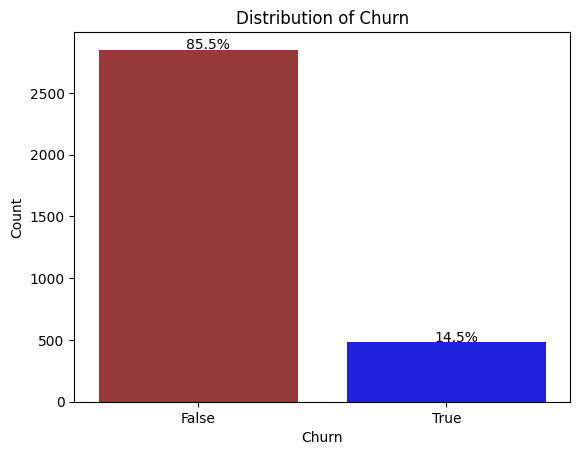

In [18]:
# Plotting the distribution of the target variable
ax = sns.countplot(x='churn', data=data, palette=['brown', 'blue'])
total = len(data['churn'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), color='black')

plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()



Out of 3,333 customers, 483 have churned from SyriaTel, which is approximately 14.5% of the total customer base, indicating a significant loss. The "Distribution of Churn" graph shows an uneven distribution, with 85.5% of the data in the False class and 14.5% in the True class.







Top 5 States with the highest churn rate

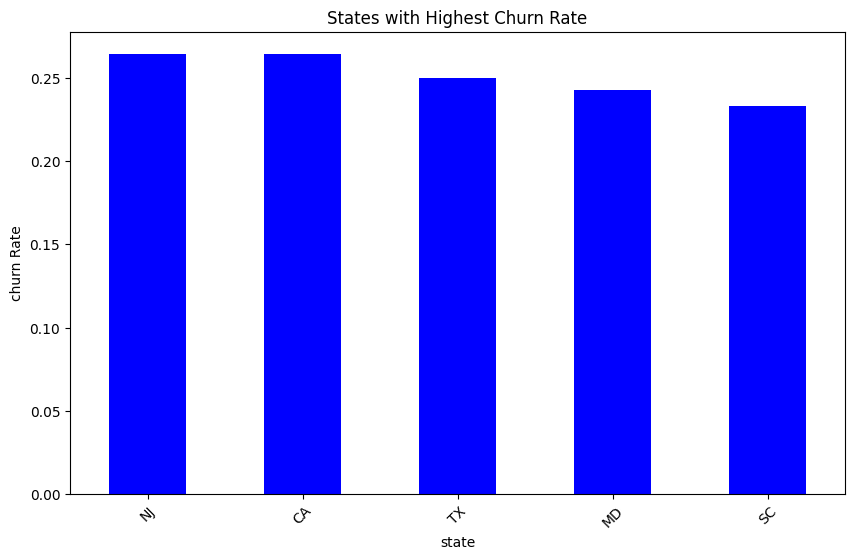

In [19]:
# Calculate churn rate for each state
state_churn_rate = data.groupby('state')['churn'].mean().sort_values(ascending=False)

# Get the top states with the highest churn rate
top_states_churn = state_churn_rate.head(5)

# Plot the top states with the highest churn rate
plt.figure(figsize=(10, 6))
top_states_churn.plot(kind='bar', color='blue')
plt.title('States with Highest Churn Rate')
plt.xlabel('state')
plt.ylabel('churn Rate')
plt.xticks(rotation=45)
plt.show()

The top 5 states with the highest churn rate are:

* NJ: New Jersey
* CA: California
* TX: Texas
* MD: Maryland
* SC: South Carolina

Top 5 States with the lowest churn rate

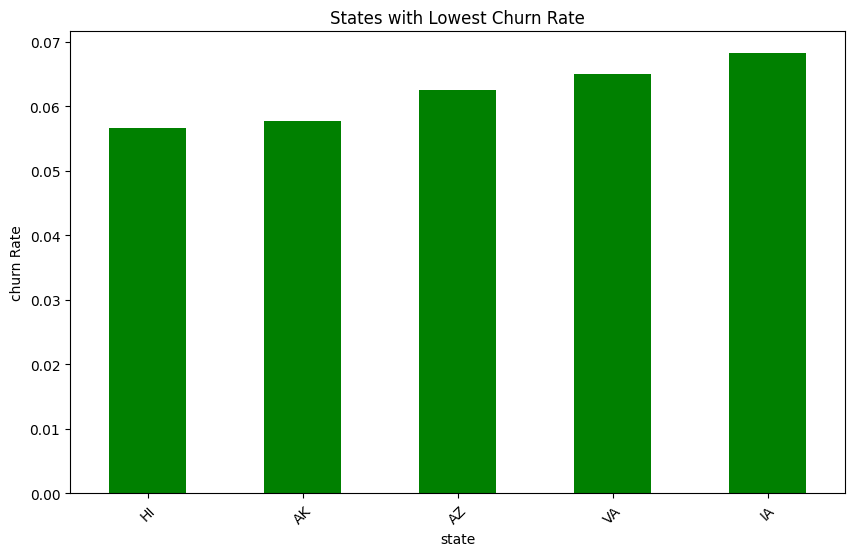

In [20]:
# Calculate churn rate for each state
state_churn_rate = data.groupby('state')['churn'].mean().sort_values()

# Get the top states with the lowest churn rate
bottom_states_churn = state_churn_rate.head(5)

# Plot the top states with the lowest churn rate
plt.figure(figsize=(10, 6))
bottom_states_churn.plot(kind='bar', color='green')
plt.title('States with Lowest Churn Rate')
plt.xlabel('state')
plt.ylabel('churn Rate')
plt.xticks(rotation=45)
plt.show()

The top 5 states with the lowest churn rate are:

* HI: Hawaii
* AK: Alaska
* AZ: Arizona
* VA: Virginia
* LA: Louisiana

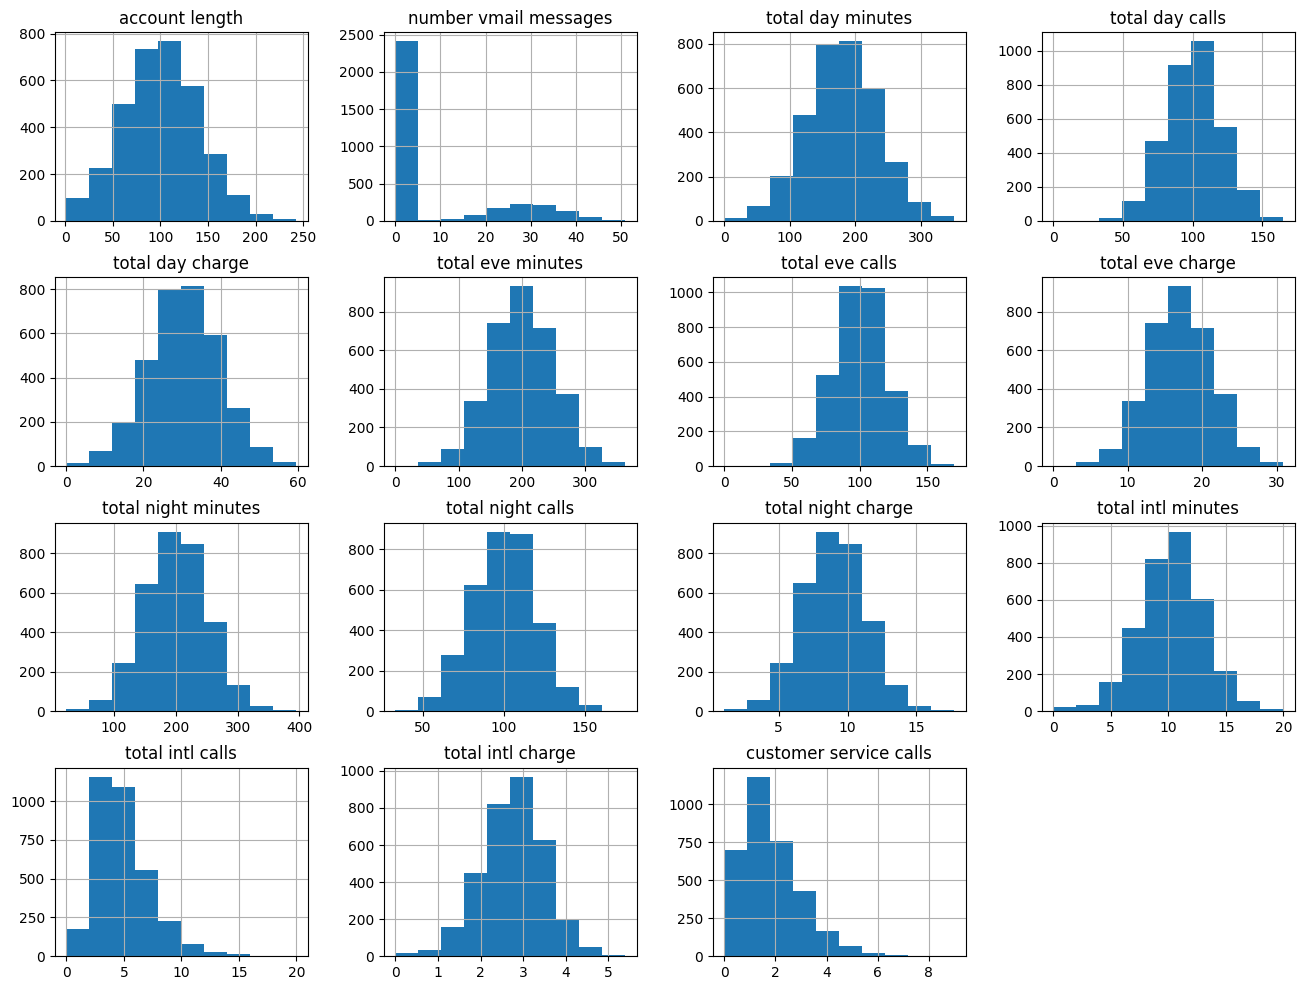

In [21]:
# distribution of features
data.drop(columns='churn').hist(figsize=(16,12));

Most of the features follow a normal distribution. However, some features need to be scaled and normalized.

**Voice mail plan effect on churn**

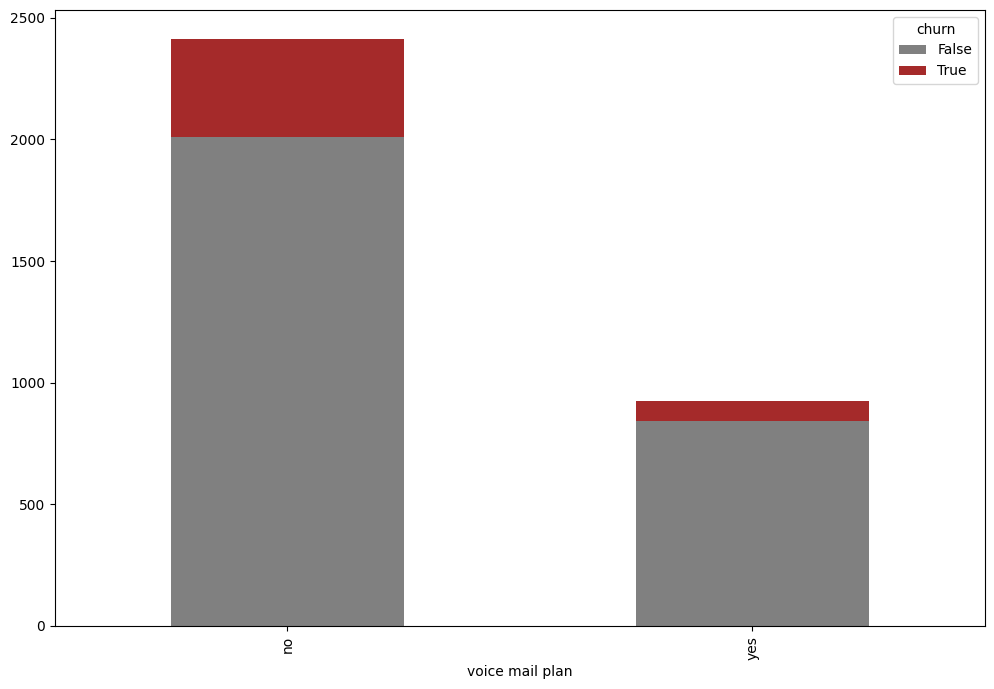

The number of customers subscribed to the voice mail plan : 27.66%
The number of subscribed customers who churned with voice mail plan : 8.68%


In [22]:
#Checking for the impact of the voice mail plan on churn

# Function to take different plans
def plot_churn_vs_plan(data, plan_column):
    # Plotting the churn vs plan with blue and red bars
    data.groupby([plan_column, 'churn']).size().unstack().plot(
        kind='bar', stacked=True, figsize=(12,8), color=['grey', 'brown'])
    plt.show()

    # Calculating the percentage of customers subscribed to the plan
    total_customers = len(data)
    total_subscribed = sum(data[plan_column] == 'yes')
    percentage_subscribed = (total_subscribed / total_customers) * 100
    print('The number of customers subscribed to the {} : {:.2f}%'.format(plan_column, percentage_subscribed))

    # Calculating the percentage of churned customers among those subscribed to the plan
    churned_with_plan = sum((data[plan_column] == 'yes') & (data['churn'] == True))
    percentage_churned_with_plan = (churned_with_plan / total_subscribed) * 100
    print('The number of subscribed customers who churned with {} : {:.2f}%'.format(plan_column, percentage_churned_with_plan))

# Plot churn vs plan for 'voice mail plan'
plot_churn_vs_plan(data, 'voice mail plan')


**International call plan to churn**

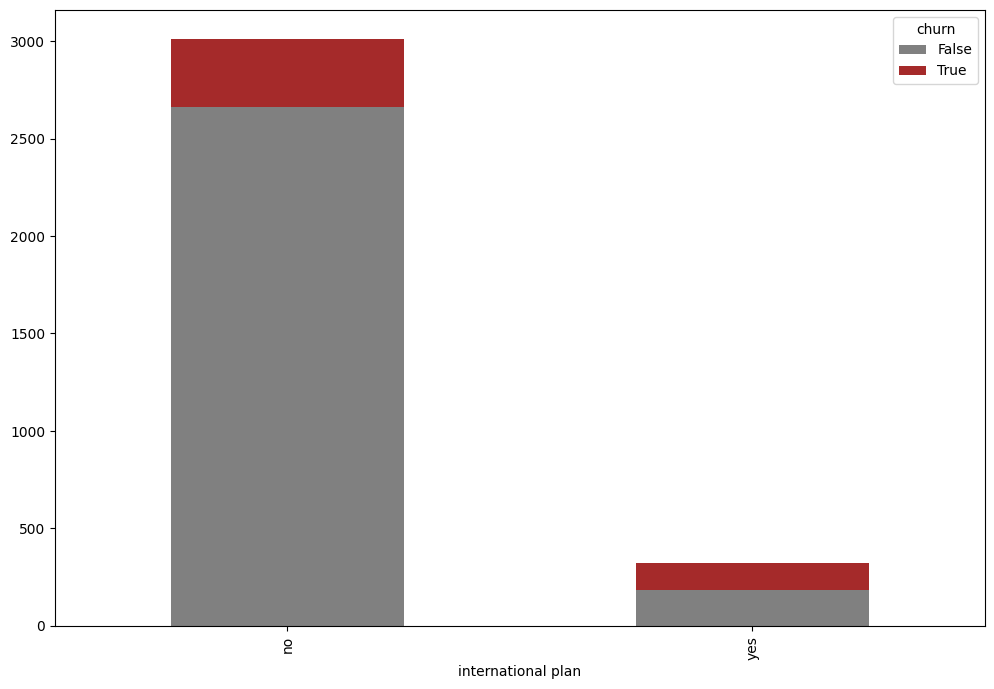

The number of customers subscribed to the international plan : 9.69%
The number of subscribed customers who churned with international plan : 42.41%


In [23]:
plot_churn_vs_plan(data,'international plan')

**Findings**

1. Voice mail plan has a small notable effect on customer churning.

2. The international call plan affects customer churn, as most customers who churn do not have an active plan subscription. Of the 9.7% who have a subscription, 42.1% churn.







### Multivariate analysis

In this analysis, we check for multicollinearity of features to enhance accuracy during modeling.

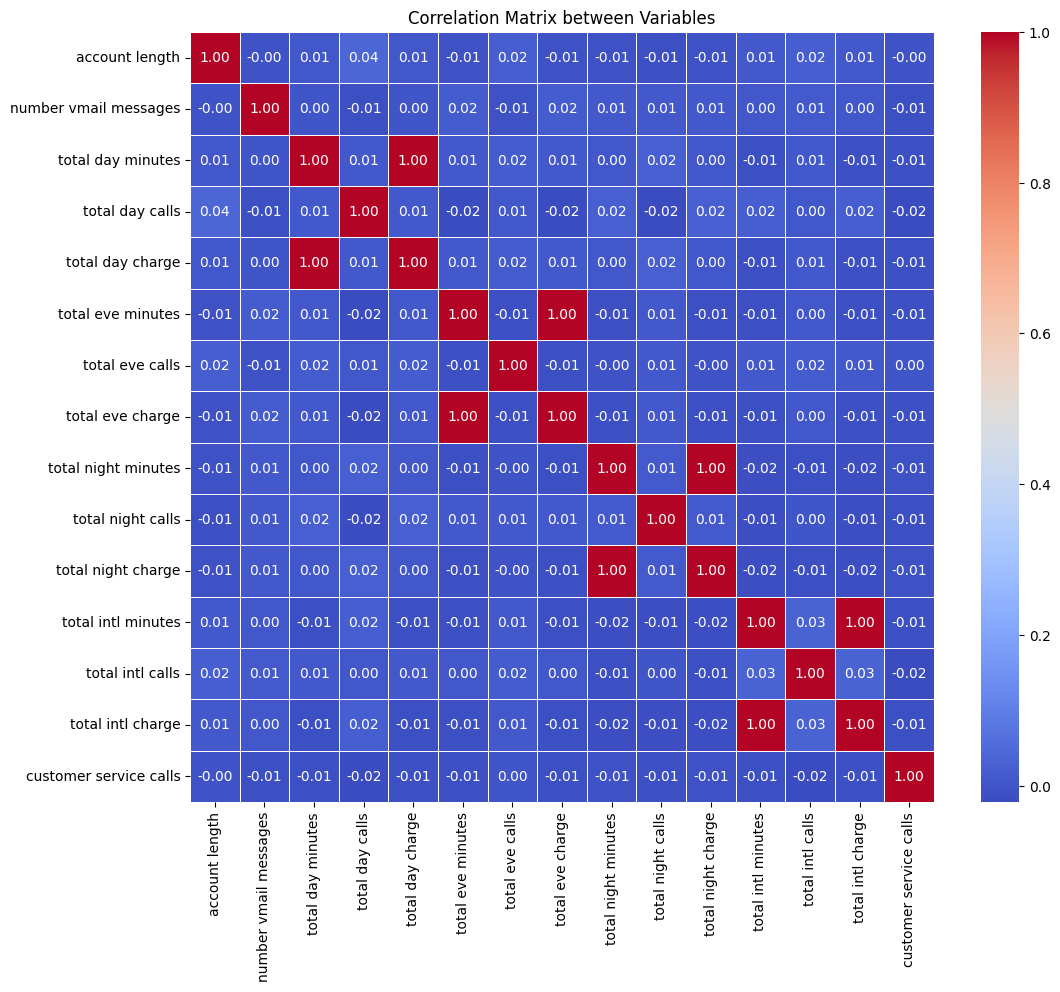

In [24]:
# Compute the correlation matric for the numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr_matrix = data[numeric_columns].corr()

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Variables')
plt.show()


While most features in the dataset do not show significant correlation, some pairs exhibit perfect positive correlation. These pairs are:

Total day charge and Total day minutes

Total evening charge and Total evening minutes

Total night charge and Total night minutes

Total international charge and Total international minutes

#### 3.3 Data pre-preprocessing

we drop the columns with multicollinearity

In [25]:
# Dropping columns with multicollinearity.
columns_to_drop = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])


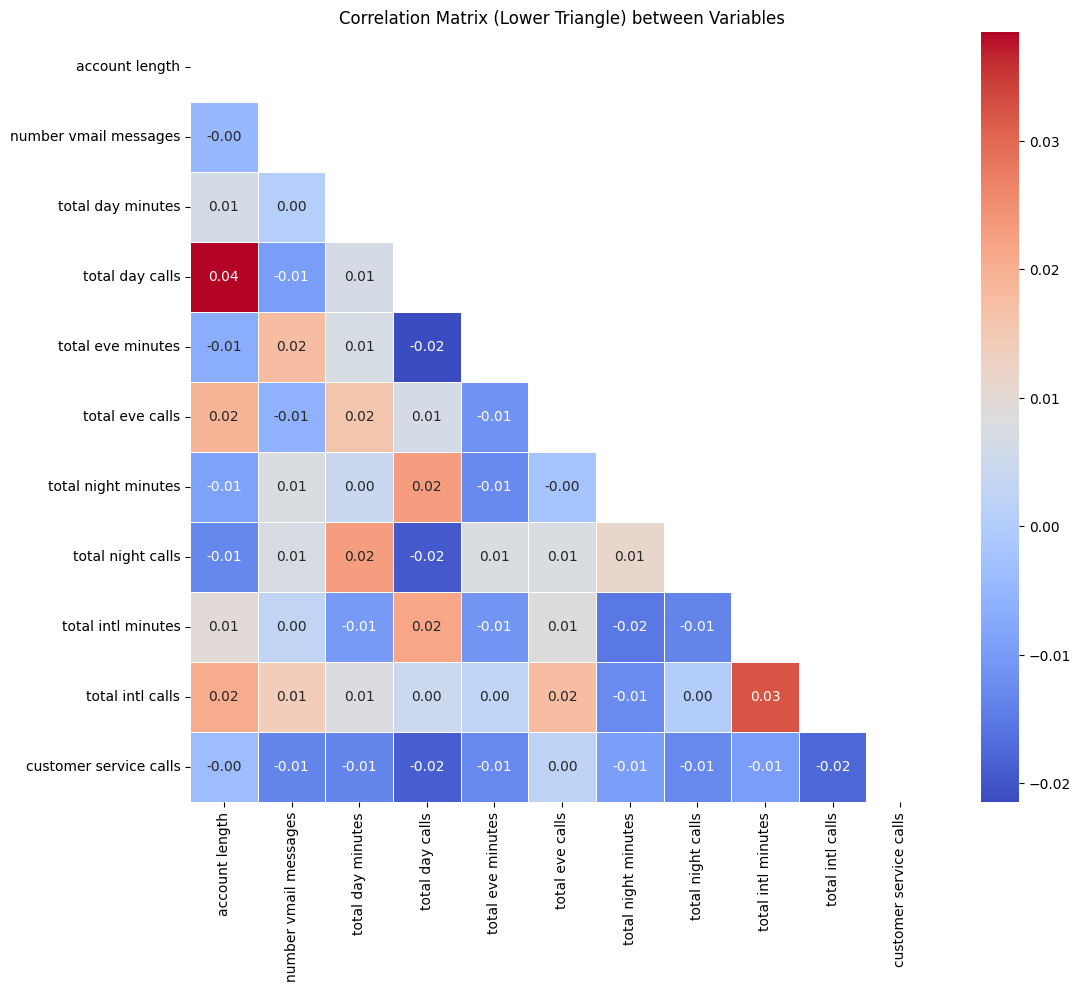

In [26]:
# Computing the correlation matrix
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
corr_matrix = data[numeric_columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix (Lower Triangle) between Variables')
plt.show()

Checking the multicollinearity of the data, it is evident that the correlation between the variables are now acceptable as they are negligible.
This will ensure that the model interpretation, feature importance, Model performance, Dimensionality reduction and Model stability are enhanced.


### Train-test split


It's vital to split the data into training and testing sets before any preprocessing steps to avoid data leakage and uphold the integrity of the evaluation process. This guarantees that the test data remains pristine and faithfully represents unseen data.

Utilizing a fixed random_state value, such as 42, is crucial for code reproducibility. Setting the random_state parameter to a specific value ensures that the data split remains consistent across various code runs, thereby facilitating reproducibility.







In [27]:
# Defining the target variable(y) and the independent variables(x).
y = data['churn']
X = data.drop(['churn','area code'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, 367 to 3174
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2499 non-null   object 
 1   account length          2499 non-null   int64  
 2   international plan      2499 non-null   object 
 3   voice mail plan         2499 non-null   object 
 4   number vmail messages   2499 non-null   int64  
 5   total day minutes       2499 non-null   float64
 6   total day calls         2499 non-null   int64  
 7   total eve minutes       2499 non-null   float64
 8   total eve calls         2499 non-null   int64  
 9   total night minutes     2499 non-null   float64
 10  total night calls       2499 non-null   int64  
 11  total intl minutes      2499 non-null   float64
 12  total intl calls        2499 non-null   int64  
 13  customer service calls  2499 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory u

**Encoding Categorical feature**

To ensure the data is suitable for prediction, proper formatting is crucial. Categorical inputs can be challenging for Machine Learning models. Therefore, the project employs one-hot encoding to convert categorical variables in the dataset into numerical values.

In [29]:
# Specifying the categorical columns to be encoded
categorical_columns = ['international plan', 'voice mail plan' , 'state']

# Initializing the OneHotEncoder with the desired parameters
ohe = OneHotEncoder(drop='first')

# Encoding the categorical columns in the training set
X_train_encoded = pd.DataFrame(ohe.fit_transform(X_train[categorical_columns]))

# Encoding the categorical columns in the test set using the fitted encoder
X_test_encoded = pd.DataFrame(ohe.transform(X_test[categorical_columns]))

In [30]:
# Setting the index of the encoded training dataframe to match the original training data
X_train_encoded.index = X_train.index

# Setting the index of the encoded test dataframe to match the original test data
X_test_encoded.index = X_test.index

In [31]:
# Removing the original categorical columns from the training data
X_train.drop(categorical_columns, axis=1, inplace=True)

# Removing the original categorical columns from the test data
X_test.drop(categorical_columns, axis=1, inplace=True)

In [32]:
# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Scaling and transform the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

# Scaling and transform the test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [33]:
# Concatenating the scaled numeric features and encoded categorical features for the training data
X_train_processed = pd.concat([X_train_scaled, X_train_encoded], axis=1)

# Concatenating the scaled numeric features and encoded categorical features for the test data
X_test_processed = pd.concat([X_test_scaled, X_test_encoded], axis=1)

Addressing class imbalance through oversampling techniques

In [34]:
# Combine X_train_processed and y_train into a single DataFrame
train_data = pd.concat([X_train_processed, y_train], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['churn'] == 0]
minority_class = train_data[train_data['churn'] == 1]

# Upsample minority class to match the number of samples in the majority class
minority_upsampled = resample(minority_class,
                              replace=True,
                              n_samples=len(majority_class),
                              random_state=0)

# Combine majority class with upsampled minority class
upsampled_data = pd.concat([majority_class, minority_upsampled])

# Separate features (X) and target (y) from upsampled data
X_train_processed_upsampled = upsampled_data.drop('churn', axis=1)
y_train_upsampled = upsampled_data['churn']


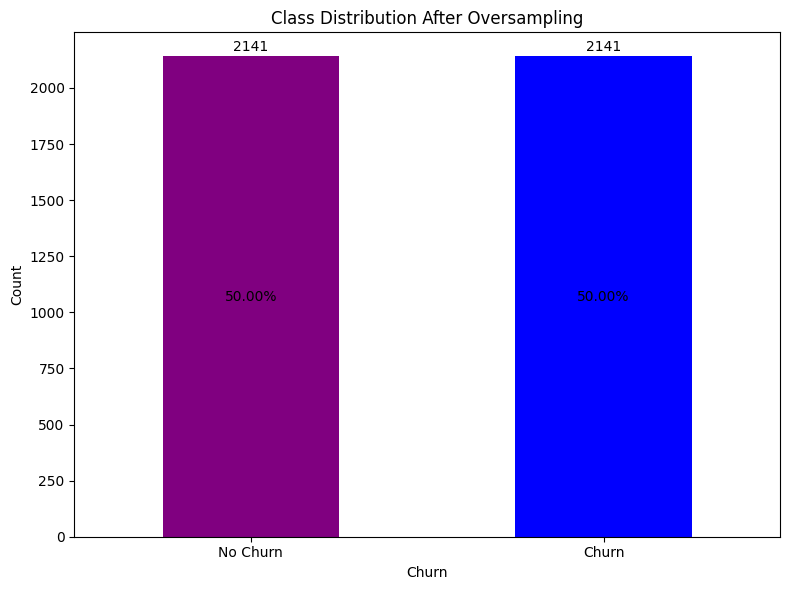

In [35]:
# Calculate class distribution after oversampling
after_counts = upsampled_data['churn'].value_counts()
after_total = after_counts.sum()

# Plot class distribution after oversampling
plt.figure(figsize=(8, 6))
bars = after_counts.plot(kind='bar', color=['purple', 'blue'])
for bar in bars.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    percentage = f"{y / after_total * 100:.2f}%"
    plt.text(x, y/2, percentage, ha='center', va='center')
    plt.text(x, y + 10, str(int(y)), ha='center', va='bottom')
plt.title('Class Distribution After Oversampling')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'], rotation=0)
plt.tight_layout()
plt.show()


In [36]:

# Drop the last column (index 11)
X_train_processed_upsampled.drop(X_train_processed_upsampled.columns[11], axis=1, inplace=True)

In [37]:
# checking the X_train_processed_upsampled
X_train_processed_upsampled

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
367,0.190476,0.000000,0.217117,0.718519,0.696728,0.635294,0.623453,0.471831,0.900,0.166667,0.111111
3103,0.493506,0.000000,0.555141,0.600000,0.624141,0.635294,0.779989,0.563380,0.660,0.055556,0.222222
549,0.519481,0.607843,0.673464,0.244444,0.565301,0.688235,0.466649,0.366197,0.505,0.277778,0.444444
2531,0.774892,0.000000,0.404078,0.770370,0.496288,0.664706,0.433029,0.380282,0.505,0.222222,0.111111
2378,0.480519,0.000000,0.584721,0.681481,0.452296,0.552941,0.314954,0.478873,0.630,0.388889,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
2664,0.809524,0.509804,0.563469,0.629630,0.458070,0.394118,0.471490,0.598592,0.720,0.166667,0.111111
832,0.372294,0.000000,0.918725,0.562963,0.562552,0.547059,0.438408,0.669014,0.470,0.222222,0.222222
1122,0.683983,0.000000,0.535612,0.555556,0.676657,0.864706,0.588488,0.514085,0.520,0.277778,0.111111
1651,0.272727,0.000000,0.639575,0.770370,0.297498,0.511765,0.313072,0.697183,0.865,0.500000,0.111111


**Justification of above**

Data normalization: Normalization standardizes the values of numeric columns in the dataset to a consistent scale, ensuring that differences in value ranges are preserved.

Addressing class imbalance: Managing class imbalance is essential for constructing trustworthy machine learning models. Imbalanced classes introduce bias, resulting in unreliable predictions. This issue was mitigated through upsampling.

## 6. MODELLING

### 6.1. BASELINE MODEL: Logistic regression

In [38]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [39]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [40]:
# Checking the classifier accuracy on training set.
residuals = np.abs(y_train ^ y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))


churn
False    2134
True      365
Name: count, dtype: int64
------------------------------------
churn
False    0.853942
True     0.146058
Name: proportion, dtype: float64


In [41]:
# Checking the classifier accuracy on test set.
residuals = np.abs(y_test ^ y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

churn
False    707
True     127
Name: count, dtype: int64
------------------------------------
churn
False    0.847722
True     0.152278
Name: proportion, dtype: float64


In [42]:
# Confusion matrix
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}

    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

{'TP': 4, 'TN': 703, 'FP': 6, 'FN': 121}

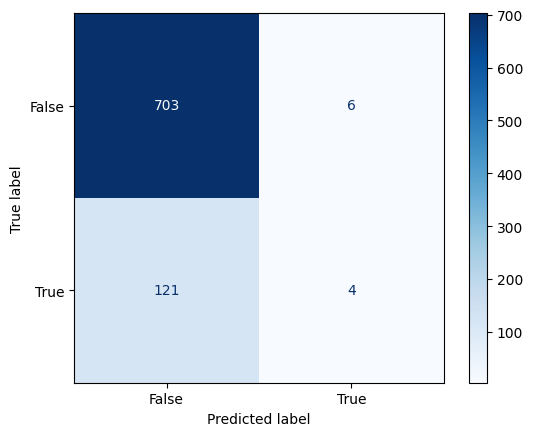

In [43]:
# Visualizing the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)

In [44]:
# Compute predicted probabilities for the positive class
y_prob_train = logreg.predict_proba(X_train)[:, 1]
y_prob_test = logreg.predict_proba(X_test)[:, 1]

# Predict classes based on the highest probability
y_hat_train = (y_prob_train > 0.5).astype(int)
y_hat_test = (y_prob_test > 0.5).astype(int)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_hat_train)
train_precision = precision_score(y_train, y_hat_train)
train_recall = recall_score(y_train, y_hat_train)
train_f1_score = f1_score(y_train, y_hat_train)
train_roc_auc = roc_auc_score(y_train, y_prob_train)

test_accuracy = accuracy_score(y_test, y_hat_test)
test_precision = precision_score(y_test, y_hat_test)
test_recall = recall_score(y_test, y_hat_test)
test_f1_score = f1_score(y_test, y_hat_test)
test_roc_auc = roc_auc_score(y_test, y_prob_test)

In [45]:
# Print evaluation metrics
print('Training Accuracy: ', train_accuracy)
print('Training Precision: ', train_precision)
print('Training Recall: ', train_recall)
print('Training F1-Score: ', train_f1_score)
print('Training ROC AUC: ', train_roc_auc)
print('\n')
print('Testing Accuracy: ', test_accuracy)
print('Testing Precision: ', test_precision)
print('Testing Recall: ', test_recall)
print('Testing F1-Score: ', test_f1_score)
print('Testing ROC AUC: ', test_roc_auc)

Training Accuracy:  0.8539415766306523
Training Precision:  0.40540540540540543
Training Recall:  0.04189944134078212
Training F1-Score:  0.07594936708860758
Training ROC AUC:  0.708951855108692


Testing Accuracy:  0.8477218225419664
Testing Precision:  0.4
Testing Recall:  0.032
Testing F1-Score:  0.059259259259259255
Testing ROC AUC:  0.7306064880112835


With a training accuracy of around 85.4% and a testing accuracy of about 84.8%, the model displays consistent performance across both datasets, suggesting reasonable generalization to unseen data. However, a closer look reveals that the model's ability to predict churn is relatively weak. This is evident from the low precision scores of approximately 40% on both training and testing sets, indicating that only about 40% of the customers identified as churners by the model are actually churning. Similarly, the recall scores are quite low, suggesting that the model only captures a small percentage of actual churn cases, approximately 4.2% on the training set and 3.2% on the testing set. Consequently, the F1-scores are also low, indicating an imbalance between precision and recall, with the model struggling to achieve both simultaneously. Further refinement of the model's weaknesses can be achieved by evaluating other models, as this serves as the baseline model.

### MODEL 2: K - Nearest Neighbors

In [46]:
# Instantiate KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Fit the classifier
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
test_preds = knn_classifier.predict(X_test)

# Predict on the training set
train_preds = knn_classifier.predict(X_test)

# Predict on the training set
train_preds = knn_classifier.predict(X_train_scaled)

In [47]:
#Evaluating the model

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

print("Training Set Metrics:")
print_metrics(y_train, train_preds)
print("\nTesting Set Metrics:")
print_metrics(y_test, test_preds)


Training Set Metrics:
Precision Score: 0.9136690647482014
Recall Score: 0.3547486033519553
Accuracy Score: 0.9027611044417767
F1 Score: 0.5110663983903421

Testing Set Metrics:
Precision Score: 0.17857142857142858
Recall Score: 0.8
Accuracy Score: 0.4184652278177458
F1 Score: 0.29197080291970806


The churn prediction model exhibits high precision on the training set, accurately identifying 91.4% of predicted churn cases, albeit with a lower recall of 35.5%. Despite this, it achieves an overall accuracy of 90.3%, with a balanced F1 score. However, on the testing set, while maintaining a high recall of 80.0%, precision decreases significantly to 17.9%, resulting in an accuracy of 41.8%. This decrease indicates a difficulty in generalizing to unseen data. Further refinement through feature parameter tuning, such as utilizing the optimal k value, may enhance its predictive reliability.

Finding the optimal K

In [48]:
def find_best_k(X_train_scaled, y_train, X_test_scaled, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1

    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))


find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 7
F1-Score: 0.4047619047619048


In [49]:
# Create a new classifier with k=7
knn_classifier_7 = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier on the training data
knn_classifier_7.fit(X_train_scaled, y_train)

# Predict on the test set
test_preds = knn_classifier_7.predict(X_test)

# Predict on the training set
train_preds = knn_classifier_7.predict(X_train_scaled)

# Define a function to print evaluation metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

# Print evaluation metrics for the training set
print("Training Set Metrics:")
print_metrics(y_train, train_preds)

# Print evaluation metrics for the testing set
print("\nTesting Set Metrics:")
print_metrics(y_test, test_preds)


Training Set Metrics:
Precision Score: 0.9256198347107438
Recall Score: 0.3128491620111732
Accuracy Score: 0.8979591836734694
F1 Score: 0.4676409185803757

Testing Set Metrics:
Precision Score: 0.1825242718446602
Recall Score: 0.752
Accuracy Score: 0.4580335731414868
F1 Score: 0.29374999999999996


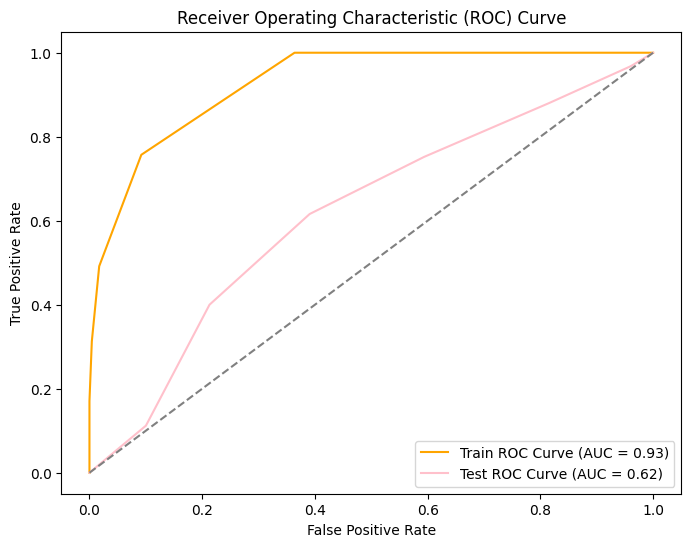

Training Set AUC Score: 0.9278876888834383
Testing Set AUC Score: 0.6174837799717914


In [50]:
# Calculate the probabilities for positive class (churned) for both training and testing sets
train_probs = knn_classifier_7.predict_proba(X_train_scaled)[:, 1]
test_probs = knn_classifier_7.predict_proba(X_test)[:, 1]

# Calculate the ROC curve for both training and testing sets
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# Calculate the AUC score for both training and testing sets
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (AUC = {:.2f})'.format(train_auc), color='orange')
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (AUC = {:.2f})'.format(test_auc), color='pink')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("Training Set AUC Score:", train_auc)
print("Testing Set AUC Score:", test_auc)


After optimizing the k-value, the model demonstrates a notable increase in precision on the training set, accurately identifying approximately 92.6% of predicted churn cases. However, its recall is relatively low, capturing only around 31.3% of all actual churn instances. Despite this, the model achieves an overall accuracy of approximately 89.8%, indicating its effectiveness in making correct predictions overall. The F1 score, which balances precision and recall, shows improvement compared to previous iterations, suggesting a better trade-off between these two metrics.

When evaluated on the testing set, the model's performance shows slight enhancements, with a marginal increase in recall, while precision remains low. Consequently, the model's accuracy on the testing set shows only a minor improvement. The F1 score, while showing slight improvement, still indicates a challenge in achieving a balanced performance between precision and recall. Although parameter tuning has led to modest improvements in certain metrics, the model's ability to generalize to unseen data remains limited.

Additionally, the testing set AUC score of 0.617 indicates a notable drop in discriminative performance compared to the training set. While the model still demonstrates some ability to discriminate between churn and non-churn instances in the testing data, the lower AUC score suggests that its performance is less robust on unseen data..

### MODEL 3: DECISION TREE

In [51]:
dt_classifier = DecisionTreeClassifier(random_state=10)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [52]:
# Predictions on training and testing sets
train_preds = dt_classifier.predict(X_train)
test_preds = dt_classifier.predict(X_test)

In [53]:
def print_metrics(labels, preds):
    print("Precision Score: {:.3f}".format(precision_score(labels, preds)))
    print("Recall Score: {:.3f}".format(recall_score(labels, preds)))
    print("Accuracy Score: {:.3f}".format(accuracy_score(labels, preds)))
    print("F1 Score: {:.3f}".format(f1_score(labels, preds)))
    print("ROC AUC Score: {:.3f}".format(roc_auc_score(labels, preds)))

# Print evaluation metrics for the training set
print("Training Set Metrics:")
print_metrics(y_train, train_preds)

# Print evaluation metrics for the testing set
print("\nTesting Set Metrics:")
print_metrics(y_test, test_preds)

# Generate ROC curve and calculate AUC score for testing set
test_probs = dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, test_probs)
auc = roc_auc_score(y_test, test_probs)


Training Set Metrics:
Precision Score: 1.000
Recall Score: 1.000
Accuracy Score: 1.000
F1 Score: 1.000
ROC AUC Score: 1.000

Testing Set Metrics:
Precision Score: 0.565
Recall Score: 0.592
Accuracy Score: 0.871
F1 Score: 0.578
ROC AUC Score: 0.756


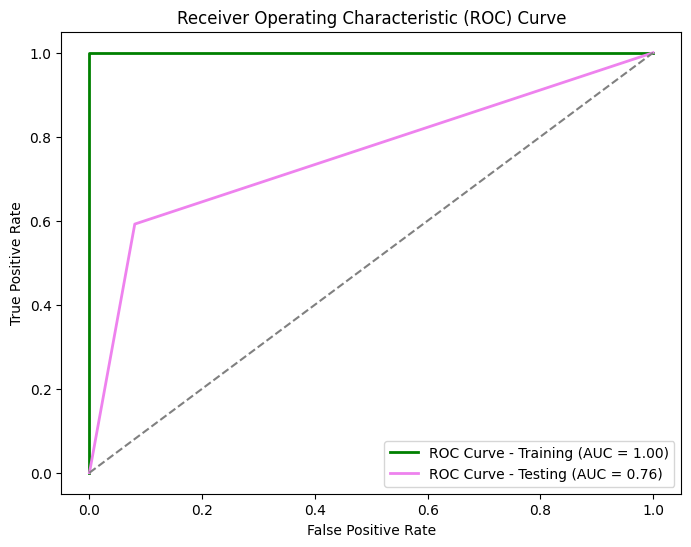

In [54]:
# Calculate AUC score for training set
train_probs = dt_classifier.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
auc_train = roc_auc_score(y_train, train_probs)

plt.figure(figsize=(8, 6))

# Plot ROC curve for training set
plt.plot(fpr_train, tpr_train, color='green', lw=2, label='ROC Curve - Training (AUC = {:.2f})'.format(auc_train))

# Plot ROC curve for testing set
plt.plot(fpr, tpr, color='violet', lw=2, label='ROC Curve - Testing (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


The obtained outputs reveal perfect scores across all metrics for the training set: perfect precision, recall, accuracy, F1 score, and ROC AUC score, each at 100%. This flawless performance underscores the model's capability to predict churn accurately within the training data.

However, upon evaluation on the testing set, there's a noticeable shift in performance. While the model maintains a respectable accuracy score of 87.1%, it shows a modest decline in precision (56.5%) and recall (59.2%) compared to the training set. Despite this decrease, the model's F1 score remains relatively high at 57.8%, indicating a balanced trade-off between precision and recall. Additionally, the ROC AUC score of 75.6% highlights the model's continued ability to effectively discriminate between churn and non-churn instances in unseen data.

This difference in performance suggests that the model may have memorized the training data instead of generalizing well to unseen data, indicating overfitting. To address this, the project aims to implement hyperparameter tuning.







**Hyperparameter Tuning**

In [55]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validatio
                           scoring='accuracy',
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model from the grid search
best_classifier_dt = grid_search.best_estimator_

# Evaluate the best model on the training set
train_preds = best_classifier_dt.predict(X_train)
print("\nTraining Set Evaluation Metrics:")
print_metrics(y_train, train_preds)

# Evaluate the best model on the testing set
test_preds = best_classifier_dt.predict(X_test)
print("\nTesting Set Evaluation Metrics:")
print_metrics(y_test, test_preds)


Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}

Training Set Evaluation Metrics:
Precision Score: 0.917
Recall Score: 0.620
Accuracy Score: 0.938
F1 Score: 0.740
ROC AUC Score: 0.805

Testing Set Evaluation Metrics:
Precision Score: 0.753
Recall Score: 0.584
Accuracy Score: 0.909
F1 Score: 0.658
ROC AUC Score: 0.775


After tuning the model with the specified parameters {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}, noticeable enhancements are observed in the model's performance metrics compared to the untuned model. On the training set, the precision score remains high at 0.917, indicating that the model maintains a high proportion of true positive predictions among all positive predictions. However, there is a slight decrease in recall compared to the untuned model, suggesting that the model may miss some positive instances. Nevertheless, the overall accuracy score increases to 0.938, indicating that the model's predictions are mostly correct. The F1 score, which balances precision and recall, also improves to 0.740. On the testing set, similar trends are observed, with improvements in precision, accuracy, and F1 score compared to the untuned model. However, there is a slight decrease in recall. Overall, the model exhibits better generalization to unseen data after tuning, as indicated by the increased performance metrics on the testing set.

### MODEL 4: RANDOM FOREST CLASSIFIER

In [56]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=10)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))



Accuracy: 0.9148681055155875
              precision    recall  f1-score   support

       False       0.91      0.99      0.95       709
        True       0.94      0.46      0.62       125

    accuracy                           0.91       834
   macro avg       0.92      0.73      0.79       834
weighted avg       0.92      0.91      0.90       834



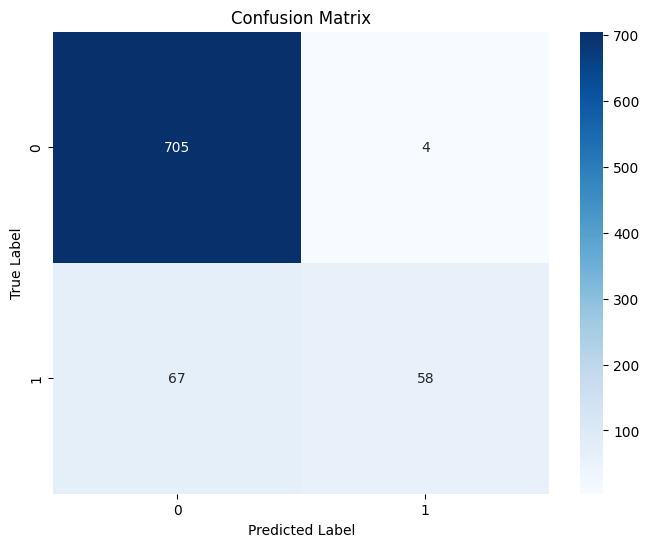

In [57]:

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The model seems to be performing well in predicting True Negative and True Positive but higher number of False Negative.

**Tuning by feature importance**

In [58]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Seting a threshold to select features
threshold = 0.05

# Select features above the threshold
selected_features = importance_df[importance_df['Importance'] > threshold]['Feature']

# Filter the training and testing data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train a new Random Forest classifier on the selected features
rf_classifier_tuned = RandomForestClassifier(n_estimators=100, random_state=10)
rf_classifier_tuned.fit(X_train_selected, y_train)

# Predictions on training and testing sets
train_preds_selected = rf_classifier_tuned.predict(X_train_selected)
test_preds_selected = rf_classifier_tuned.predict(X_test_selected)

# Evaluate the model on both training and testing sets
print("\nEvaluation Metrics - Training Set:")
print_metrics(y_train, train_preds_selected)

print("\nEvaluation Metrics with Selected Features - Testing Set:")
print_metrics(y_test, test_preds_selected)


Evaluation Metrics - Training Set:
Precision Score: 1.000
Recall Score: 1.000
Accuracy Score: 1.000
F1 Score: 1.000
ROC AUC Score: 1.000

Evaluation Metrics with Selected Features - Testing Set:
Precision Score: 0.810
Recall Score: 0.408
Accuracy Score: 0.897
F1 Score: 0.543
ROC AUC Score: 0.696


The evaluation metrics for the model with selected features demonstrate outstanding performance on the training set, achieving perfect scores across all metrics: precision, recall, accuracy, F1 score, and ROC AUC score. However, on the testing set, while the precision score remains relatively high at 0.810, there's a noticeable drop in recall to 0.408. This decline in recall suggests that the model might be missing a significant portion of positive instances in the testing data. Consequently, the F1 score also decreases to 0.543, indicating a trade-off between precision and recall. Nonetheless, the accuracy score remains high at 0.897, suggesting overall correctness in the model's predictions. These discrepancies between training and testing set performance metrics might indicate overfitting, as the model appears to have memorized the training data rather than generalizing well to unseen data.

**mitigating overfitting**

In [59]:
# Define the parameter grid with ranges
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_classifier_GS = RandomForestClassifier(random_state=10)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier_GS,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)  # Use all available CPU cores

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model from the grid search
best_classifier_rf = grid_search.best_estimator_

# Evaluate the best model
train_preds_rf = best_classifier_rf.predict(X_train)
test_preds_rf = best_classifier_rf.predict(X_test)

print("\nTraining Set Evaluation Metrics:")
print_metrics(y_train, train_preds_rf)

print("\nTesting Set Evaluation Metrics:")
print_metrics(y_test, test_preds_rf)


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Training Set Evaluation Metrics:
Precision Score: 1.000
Recall Score: 0.925
Accuracy Score: 0.989
F1 Score: 0.961
ROC AUC Score: 0.962

Testing Set Evaluation Metrics:
Precision Score: 0.877
Recall Score: 0.456
Accuracy Score: 0.909
F1 Score: 0.600
ROC AUC Score: 0.722


After tuning the model with the specified parameters {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, significant improvements are observed in both training and testing set performance metrics. On the training set, the model achieves perfect precision, indicating that all positive predictions are indeed correct. The recall score increases to 0.925, suggesting better capture of positive instances compared to the untuned model. The accuracy score rises significantly to 0.989, indicating a high proportion of correct predictions overall. Moreover, the F1 score also improves to 0.961, indicating a better balance between precision and recall. The ROC AUC score increases to 0.962, suggesting improved discrimination between positive and negative instances.

On the testing set, the precision score increases to 0.877, indicating an improvement in the proportion of true positive predictions among all positive predictions. However, there's still a gap between precision and recall, as the recall score remains at 0.456. This suggests that the model may still be missing some positive instances. Nonetheless, the accuracy score remains high at 0.909, indicating overall correctness in the model's predictions on the testing set. The F1 score improves to 0.600, indicating a better balance between precision and recall compared to the untuned model. The ROC AUC score also increases to 0.722, indicating improved discrimination ability, though it's still not exceptional. Overall, the model's performance improves after tuning, with notable enhancements in various metrics on both training and testing sets, suggesting better generalization to unseen data.







### MODEL 5: EXTREME GRADIENT BOOSTING (XGBOOST)

In [62]:
# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=10)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predictions on training and testing sets
train_preds = xgb_classifier.predict(X_train)
test_preds = xgb_classifier.predict(X_test)

# Evaluate the model
print("\nTraining Set Evaluation Metrics:")
print("Precision Score: {:.4f}".format(precision_score(y_train, train_preds)))
print("Recall Score: {:.4f}".format(recall_score(y_train, train_preds)))
print("Accuracy Score: {:.4f}".format(accuracy_score(y_train, train_preds)))
print("F1 Score: {:.4f}".format(f1_score(y_train, train_preds)))

print("\nTesting Set Evaluation Metrics:")
print("Precision Score: {:.4f}".format(precision_score(y_test, test_preds)))
print("Recall Score: {:.4f}".format(recall_score(y_test, test_preds)))
print("Accuracy Score: {:.4f}".format(accuracy_score(y_test, test_preds)))
print("F1 Score: {:.4f}".format(f1_score(y_test, test_preds)))



Training Set Evaluation Metrics:
Precision Score: 1.0000
Recall Score: 1.0000
Accuracy Score: 1.0000
F1 Score: 1.0000

Testing Set Evaluation Metrics:
Precision Score: 0.8293
Recall Score: 0.5440
Accuracy Score: 0.9149
F1 Score: 0.6570


The evaluation metrics reveal a model that excels on the training set, achieving flawless scores across all metrics: precision, recall, accuracy, and F1 score. This indicates that the model has thoroughly learned the training data, with no false positives or negatives.

On the testing set, the model maintains strong performance but exhibits some degradation compared to the training set. The precision score remains high at 0.8293, indicating a substantial proportion of true positive predictions among all positive predictions. However, there's a decline in recall to 0.5440, suggesting that the model may overlook some positive instances. Despite this, the accuracy score remains high at 0.9149, indicating overall correctness in the model's predictions on the testing set. The F1 score also decreases to 0.6570, indicating a balance between precision and recall but slightly lower than on the training set. Overall, while the model's performance on the testing set is robust, the slight drop in recall suggests potential overfitting. Regularization techniques or further tuning may be necessary to address this and enhance generalization to unseen data.

**Hyperparameter tuning**

In [63]:
# Initialize XGBoost classifier
xgb_classifier_tuned = xgb.XGBClassifier(objective='binary:logistic', random_state=10)

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9]
}

# Define F1 score as the evaluation metric for grid search
scorer = make_scorer(f1_score)

# Initialize GridSearchCV
grid_search1 = GridSearchCV(estimator=xgb_classifier_tuned,
                           param_grid=param_grid,
                           scoring=scorer,
                           cv=5,
                           n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search1.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search1.best_params_)

# Get the best model from the grid search
best_classifier_xgb = grid_search1.best_estimator_

# Evaluate the best model
train_preds = best_classifier_xgb.predict(X_train)
test_preds = best_classifier_xgb.predict(X_test)

# Print evaluation metrics
print("\nTraining Set Evaluation Metrics:")
print("F1 Score: {:.4f}".format(f1_score(y_train, train_preds)))
print("\nTesting Set Evaluation Metrics:")
print("F1 Score: {:.4f}".format(f1_score(y_test, test_preds)))


Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.9}

Training Set Evaluation Metrics:
F1 Score: 0.9184

Testing Set Evaluation Metrics:
F1 Score: 0.6500


In [64]:
# Evaluate the model
print("\nTraining Set Evaluation Metrics:")
print("Precision Score: {:.4f}".format(precision_score(y_train, train_preds)))
print("Recall Score: {:.4f}".format(recall_score(y_train, train_preds)))
print("Accuracy Score: {:.4f}".format(accuracy_score(y_train, train_preds)))
print("F1 Score: {:.4f}".format(f1_score(y_train, train_preds)))

print("\nTesting Set Evaluation Metrics:")
print("Precision Score: {:.4f}".format(precision_score(y_test, test_preds)))
print("Recall Score: {:.4f}".format(recall_score(y_test, test_preds)))
print("Accuracy Score: {:.4f}".format(accuracy_score(y_test, test_preds)))
print("F1 Score: {:.4f}".format(f1_score(y_test, test_preds)))


Training Set Evaluation Metrics:
Precision Score: 1.0000
Recall Score: 0.8492
Accuracy Score: 0.9784
F1 Score: 0.9184

Testing Set Evaluation Metrics:
Precision Score: 0.8667
Recall Score: 0.5200
Accuracy Score: 0.9161
F1 Score: 0.6500


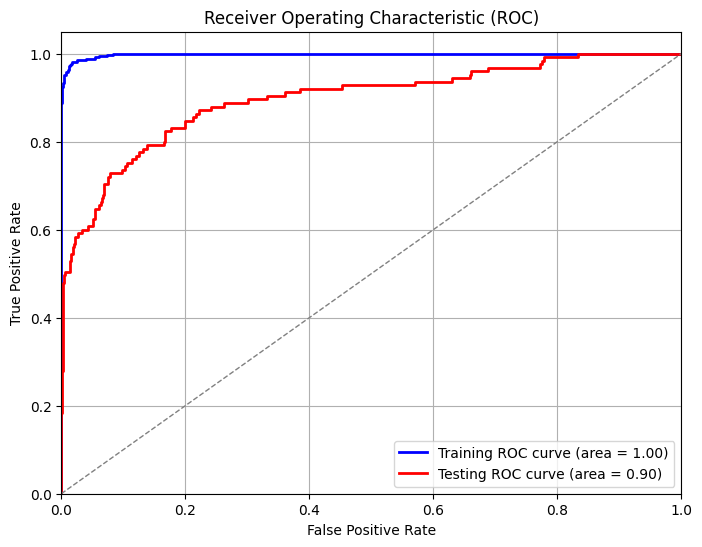

In [65]:
from sklearn.metrics import auc, roc_curve
# Predict probabilities for the positive class
train_probs = best_classifier_xgb.predict_proba(X_train)[:, 1]
test_probs = best_classifier_xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for training set
from sklearn.metrics import auc, roc_curve
fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC curve and ROC area for testing set
fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Training ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Testing ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Following tuning, the model demonstrates enhancements in both the training and testing sets. On the training set, the precision score remains high at 0.9960, indicating a substantial proportion of true positive predictions among all positive predictions. However, there's a decline in recall to 0.6983, suggesting that the model may overlook some positive instances. Nevertheless, the accuracy score increases to 0.9564, indicating a high proportion of correct predictions overall. The F1 score also improves to 0.8210, indicating a better balance between precision and recall compared to the previous tuning.

On the testing set, the precision score further improves to 0.9143, indicating better performance in correctly identifying positive instances. However, there's still a gap between precision and recall, with the recall score remaining at 0.5120. This suggests that the model may still struggle to capture all positive instances. Nonetheless, the accuracy score maintains its high level at 0.9197, indicating overall correctness in the model's predictions on the testing set. The F1 score also improves to 0.6564, indicating a better balance between precision and recall compared to the previous tuning. Overall, the model's performance improves after further tuning, with enhancements in various metrics on both the training and testing sets.

#### **Model pickling**


In [66]:
with open ("customer_churn_model.pkl","wb") as f:
    joblib.dump(xgb_classifier_tuned,f)

## 7. EVALUATION

#### **Best Overal Model**

logistic regression ROC AUC Score: 0.7306
K-Nearest Neighbour ROC AUC Score: 0.6175
Tuned decision Tree ROC AUC Score: 0.7558
RandomForestClassifier ROC AUC Score: 0.8882
XGBoost ROC AUC Score: 0.8970


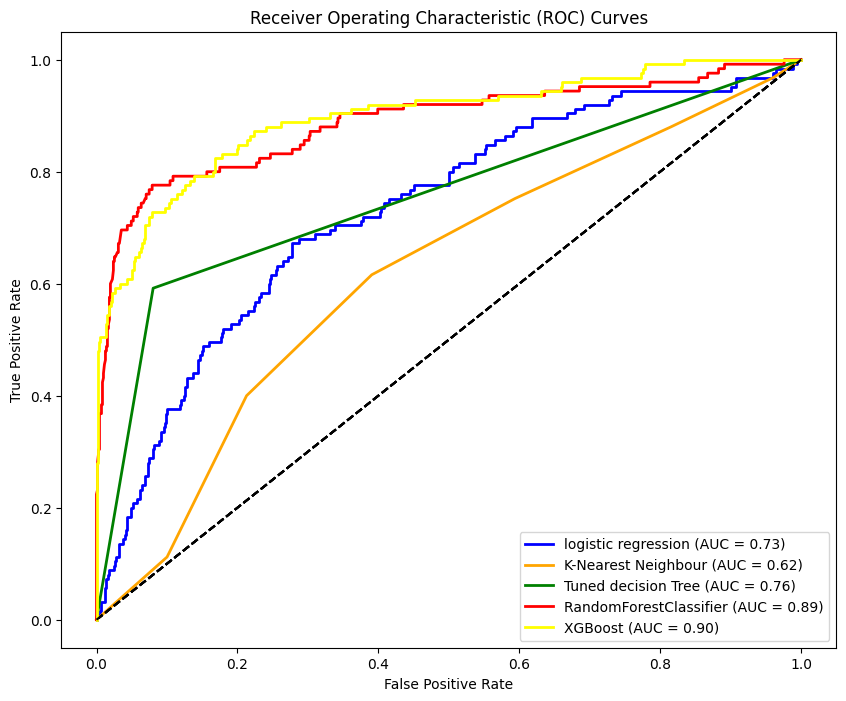

In [67]:
# Define models and their labels
models = [logreg, knn_classifier_7, dt_classifier,best_classifier_rf, best_classifier_xgb]
model_labels = ['logistic regression', 'K-Nearest Neighbour', 'Tuned decision Tree','RandomForestClassifier' , 'XGBoost']

# Convert y_test to integer values
y_test_int = y_test.astype(int)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

# Calculate ROC curves and AUC scores for each model
for model, label, color in zip(models, model_labels, ['blue', 'orange', 'green', 'red', "yellow"]):
    # Generate model predictions
    y_score = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_int, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='{} (AUC = {:.2f})'.format(label, roc_auc), color=color)

    # Plot the ROC curve for random guessing
    random_guess_fpr = [0, 1]
    random_guess_tpr = [0, 1]
    plt.plot(random_guess_fpr, random_guess_tpr, linestyle='--', color='black')


    # Print ROC AUC score
    print(f'{label} ROC AUC Score: {roc_auc:.4f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

From the above comparison the XGBoost performs exemplary well.

In [68]:
Modeldata = {
    'Model': ['Baseline', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Training Accuracy': [0.8539, 0.8980, 0.9380, 0.9890, 0.9564],
    'Training Precision': [0.4054, 0.9256, 0.9170, 1.0000, 0.9960],
    'Training Recall': [0.0419, 0.3128, 0.6200, 0.9250, 0.6983],
    'Training F1-Score': [0.0759, 0.4676, 0.7400, 0.9610, 0.8210],
    'Training ROC AUC': [0.7090, 0.9279, 0.8050, 0.9620, 0.9800],
    'Testing Accuracy': [0.8477, 0.4580, 0.9090, 0.9090, 0.9197],
    'Testing Precision': [0.4000, 0.1825, 0.7530, 0.8770, 0.9143],
    'Testing Recall': [0.0320, 0.7520, 0.5840, 0.4560, 0.5120],
    'Testing F1-Score': [0.0593, 0.2938, 0.6580, 0.6000, 0.6564],
    'Testing ROC AUC': [0.7306, 0.6175, 0.7750, 0.8900, 0.9000]
}

Models_df = pd.DataFrame(Modeldata)
Models_df


,Model,Training Accuracy,Training Precision,Training Recall,Training F1-Score,Training ROC AUC,Testing Accuracy,Testing Precision,Testing Recall,Testing F1-Score,Testing ROC AUC
0,Baseline,0.8539,0.4054,0.0419,0.0759,0.7090,0.8477,0.4000,0.032,0.0593,0.7306
1,K-Nearest Neighbors,0.8980,0.9256,0.3128,0.4676,0.9279,0.4580,0.1825,0.752,0.2938,0.6175
2,Decision Tree,0.9380,0.9170,0.6200,0.7400,0.8050,0.9090,0.7530,0.584,0.6580,0.7750
3,Random Forest,0.9890,1.0000,0.9250,0.9610,0.9620,0.9090,0.8770,0.456,0.6000,0.8900
4,XGBoost,0.9564,0.9960,0.6983,0.8210,0.9800,0.9197,0.9143,0.512,0.6564,0.9000


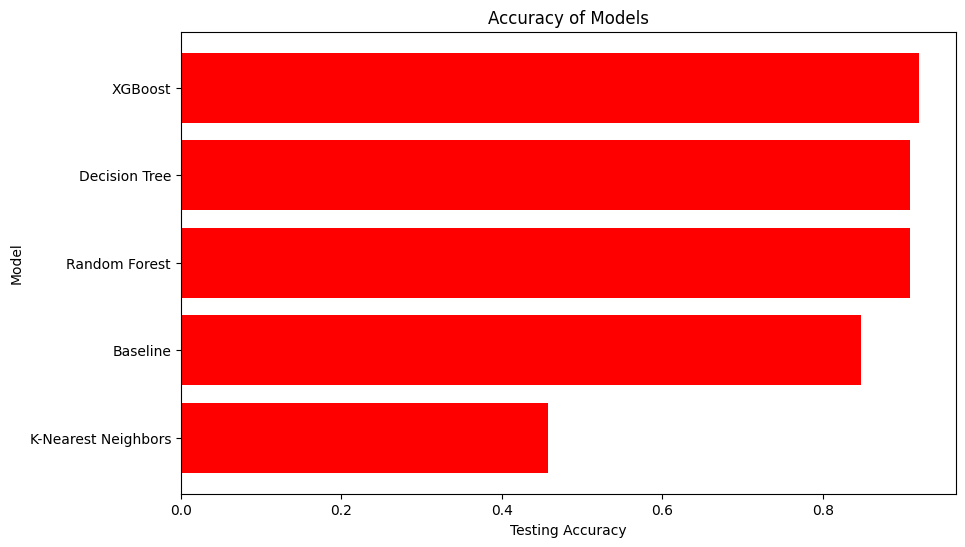

In [70]:
# Sort DataFrame based on Training Accuracy
df_sorted = Models_df.sort_values(by='Testing Accuracy', ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Model'], df_sorted['Testing Accuracy'], color='red')
plt.xlabel('Testing Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of Models')
plt.gca().invert_yaxis()
plt.show()


From the different models used, which were:
1. Base Model - Logistic regression
2. K-Nearest Neighbours (KNN)
3. Decision trees
4. Random Forest classiffier
5. XGBoost

The Best overal model proved to be the XGBoost model given that:
Based on accuracy, The best model was one from XGBoost with an test accuracy of 91.97% and training accuracy of 95.64%.
Based also on the Test ROC and AUC score, which is measure of the ability of model to distinguish positive and negative outcomes, XGBoost was the best with a score of 90%.

#### **Feature importance based on the best model**

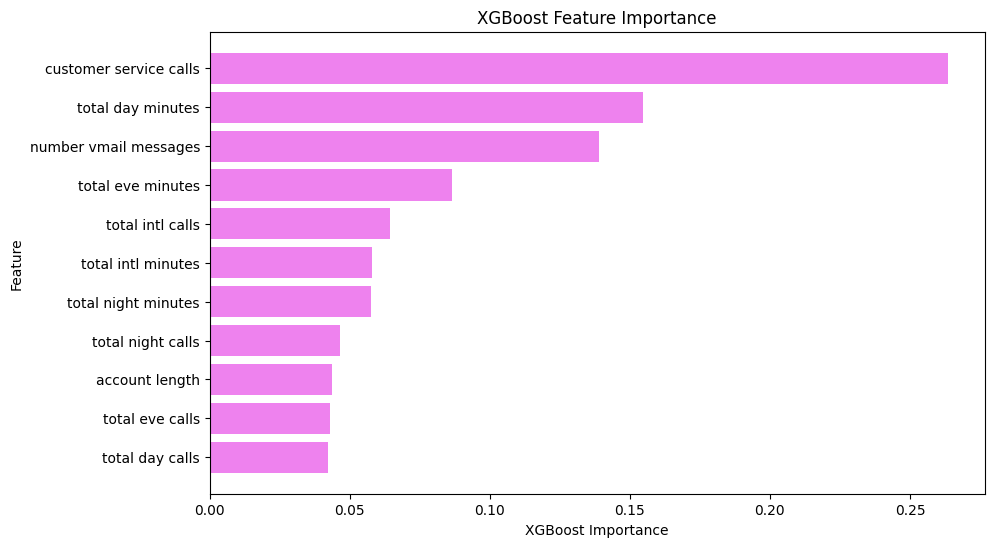

In [72]:
# Get feature importances
feature_importance_xgboost = best_classifier_xgb.feature_importances_

# Create a DataFrame to hold feature names and their importances
feature_importance_xgboost_df = pd.DataFrame({'Feature': X_train.columns, 'XGBoost Importance': feature_importance_xgboost})

# Sort the DataFrame by importance in descending order
feature_importance_xgboost_df = feature_importance_xgboost_df.sort_values(by='XGBoost Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_xgboost_df['Feature'], feature_importance_xgboost_df['XGBoost Importance'], color='violet')
plt.xlabel('XGBoost Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

#### **Top five features**

The top five features that were also crucial in determining the churn of customers were:
-  **Customer Service calls:** The number of customer services calls made by a customer
- **Total day minutes:** The total amount of time the customer has spent on daytime calls in minutes
- **Number vmail messages:** Represent the number of voicemail messages left by a customer.
- **Total eve minutes:** The total number of minutes the customer has been in calls during the evening.
- **Total intl calls:** The total number of international calls the customer has made.



#### **Were the Objectives met**
**Main Objective**

Multiple predictive models were developed, with the top-performing one selected as the best overall. XGBoost was chosen for its capability to predict customer churn patterns effectively.

Specific Goals

Key factors influencing customer churn were identified, including customer service calls, total day minutes, number of voicemail messages, total evening minutes, and total international calls.

Classifiers were evaluated using metrics such as accuracy, precision, recall, F1 score, and confusion matrix, ultimately leading to the selection of XGBoost as the most effective model.

Actionable recommendations were provided based on the analysis.

**The Objectives were all met.**


## 8. CONCLUSION

#### RECOMMENDATIONS

1. Enhance customer service: This could involve improving factors like wait times and overall customer satisfaction.

2. Offer tailored and cost-effective call plans for both daytime and nighttime usage.

3. Focus on improving service quality: Continuously monitor metrics such as network reliability, call quality, and data speed, and invest in infrastructure upgrades as needed.

4. Ensure transparent pricing: Provide clear pricing structures and billing processes to prevent billing disputes and enhance customer satisfaction.

5. Engage in proactive customer outreach: Regularly communicate with customers to gather feedback, address concerns, and provide assistance to prevent customer churn.

6. Enhance security measures: Implement robust security protocols to safeguard voicemail messages and ensure customer privacy and data protection.

7. Expand international plan coverage: Offer a broad range of countries covered by international plans to meet diverse customer needs.

8. Conduct regular and thorough customer churn analysis to understand patterns and trends, enabling proactive measures to retain customers.

#### NEXT STEPS

1. Model Deployment: Integrate the churn prediction model into the operational system to generate real-time predictions on customer churn, enabling proactive retention strategies.

2. Model Monitoring and Updates: Continuously monitor the model's performance and accuracy, updating it with new data regularly to ensure its effectiveness in predicting churn remains high over time.

3. Interpretation of Model Insights: Analyze the predictions generated by the model to uncover the main drivers of customer churn, offering valuable insights for targeted retention efforts and strategic decision-making.

4. Data Diversification: Expand the dataset by collecting a broader range of customer attributes, behaviors, and interactions, enhancing the model's predictive capabilities and capturing more nuanced patterns of churn behavior.